In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(4)

In [2]:
def euclideanDist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [3]:
class KMeans:
    def __init__(self, K=5, maxIters=100, plotSteps=False):
        self.K = K                  # Number of clusters       
        self.plotSteps = plotSteps  # To plot the intermediate clustering if necessary
        self.maxIters = maxIters    # Maximum number of iterations the algorithm is allowed to run if it hasn't converged yet

        # The centers (mean feature vector) for each cluster
        self.centroids = []

        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # Mean distance from all the points to their nearest centroids
        self.meanDist = 0

    def predict(self, data):
        self.data = data
        self.nSamples, self.nFeatures = data.shape
        # nSamples will hold the number of data points available while nFeatures will hold the number of features each point has
        # Eg: If we are clustering points on a 2D plane, nFeatures will be 2 (its x and y coordinates)

        # Initialize the centroids randomly
        randomSampleIndices = np.random.choice(self.nSamples, self.K, replace=False)
        self.centroids = [self.data[index] for index in randomSampleIndices]

        # Optimize the clusters iteratively
        for iteration in range(self.maxIters):
            start = time.time()

            # Assign samples to closest centroids (creating new clusters)
            self.clusters = self.createClusters(self.centroids)

            if self.plotSteps: self.plot()

            # Calculate new centroids from the newly generated clusters
            centroidsOld = self.centroids
            self.centroids = self.getCentroids(self.clusters)

            print(f"Iteration {iteration} finished in {time.time() - start} s")
            
            # Check if clusters have changed (checking for convergence)
            if self.isConverged(centroidsOld, self.centroids):
                # Calculate the mean distance of each point to its nearest centroid
                self.meanDist = self.calcMeanDist(self.centroids)

                print(f"Converged at iteration {iteration}")
                break

            if self.plotSteps:
                self.plot()

        # Classify samples as the index of their clusters
        return self.getClusterLabels(self.clusters), self.meanDist, [len(i) for i in self.clusters], self.centroids

    def getClusterLabels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.nSamples)

        for clusterIndex, cluster in enumerate(clusters):
            for sampleIndex in cluster:
                labels[sampleIndex] = clusterIndex
        return labels

    def createClusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.data):
            clusters[self.closestCentroid(sample, centroids)].append(index)
        return clusters

    def closestCentroid(self, sample, centroids):
        return np.argmin([euclideanDist(sample, point) for point in centroids])

    def getCentroids(self, clusters):
        # Assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.nFeatures))
        for clusterIndex, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.data[cluster], axis=0)
            centroids[clusterIndex] = cluster_mean
        return centroids

    def isConverged(self, centroidsOld, centroids):
        # If there is no change in the centroids, the algorithm has converged
        return sum([euclideanDist(centroidsOld[i], centroids[i]) for i in range(self.K)]) == 0 

    def calcMeanDist(self, centroids):
        # Calculatin the mean distance of every data point to its nearest centroid
        ret = 0
        for index in range(self.K):
            ret += np.sum([euclideanDist(self.data[point], centroids[index]) for point in self.clusters[index]])
        return ret/self.nSamples

    def plot(self):
        fig, ax = plt.subplots()
        for i, index in enumerate(self.clusters):
            point = self.data[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=4)
        plt.show()

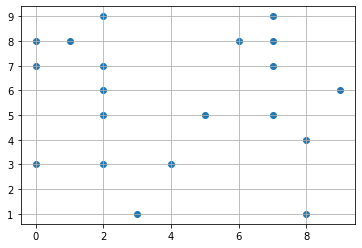

In [4]:
X = np.random.randint(0, 10, (20,2))
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()

Iteration 0 finished in 0.0018982887268066406 s
Iteration 1 finished in 0.0025551319122314453 s
Iteration 2 finished in 0.00212860107421875 s
Iteration 3 finished in 0.0021359920501708984 s
Iteration 4 finished in 0.003317594528198242 s
Converged at iteration 4

Mean distance to nearest hotel is 2.131918990129104 m
Load on the hotels: [5, 10, 5]
Ideal Hotel Locations:
[[7.4 4.2]
 [1.6 5.1]
 [5.8 8.2]]


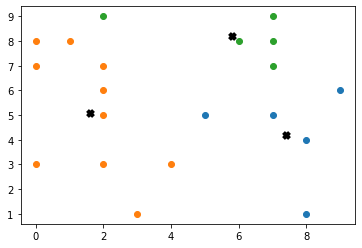

In [5]:
k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
yPred = k.predict(X)
print(f"\nMean distance to nearest hotel is {yPred[1]} m")
print(f"Load on the hotels: {yPred[2]}") # Number of points in each cluster
print(f"Ideal Hotel Locations:\n{yPred[3]}")
k.plot()

# Trying to reach global Minima 
Since the output of the K Means clustering algorithm is very dependant on the initial random values of the centroids, we need to do multiple runs of the algorithm to find the global optima

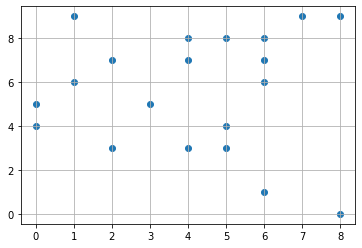

In [6]:
X = np.random.randint(0, 10, (20,2))
axes = plt.axes()
axes.grid()
plt.scatter(X[:,0], X[:,1])
plt.show()

Trial 0
Iteration 0 finished in 0.002341747283935547 s
Iteration 1 finished in 0.0024802684783935547 s
Iteration 2 finished in 0.0032455921173095703 s
Iteration 3 finished in 0.003819704055786133 s
Iteration 4 finished in 0.0016252994537353516 s
Converged at iteration 4

Mean distance to nearest hotel is 1.7194317230541472 m
Load on the hotels: [5, 8, 7]
Ideal Hotel Locations:
[[5.6        2.2       ]
 [5.75       7.75      ]
 [1.28571429 5.57142857]]
-----------------------------------------------------------

Trial 1
Iteration 0 finished in 0.0016314983367919922 s
Iteration 1 finished in 0.0018801689147949219 s
Iteration 2 finished in 0.008505821228027344 s
Iteration 3 finished in 0.0019555091857910156 s
Iteration 4 finished in 0.0014925003051757812 s
Converged at iteration 4

Mean distance to nearest hotel is 1.7102393491778602 m
Load on the hotels: [6, 6, 8]
Ideal Hotel Locations:
[[5.6        2.2       ]
 [5.75       7.75      ]
 [1.28571429 5.57142857]]
--------------------------

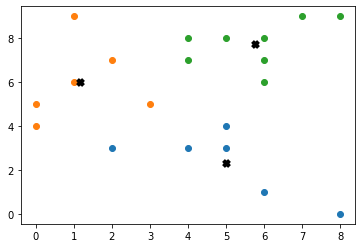

In [7]:
trials = 10

k_min = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
print("Trial 0")
yPred_min = k_min.predict(X)
d_min = yPred[1]
print(f"\nMean distance to nearest hotel is {yPred_min[1]} m")
print(f"Load on the hotels: {yPred_min[2]}") # Number of points in each cluster
print(f"Ideal Hotel Locations:\n{yPred_min[3]}")
print("-----------------------------------------------------------\n")

for trial in range(1, trials+1):
    print(f"Trial {trial}")
    k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
    yPred = k.predict(X)
    print(f"\nMean distance to nearest hotel is {yPred[1]} m")
    print(f"Load on the hotels: {yPred[2]}") # Number of points in each cluster
    print(f"Ideal Hotel Locations:\n{yPred_min[3]}")
    print("-----------------------------------------------------------\n")
    d = yPred[1]
    if(d < d_min):
        if(d <= 0): continue # Impossible case
        d_min = d
        k_min = k
        yPred_min = yPred
    else: del k

print("\nDone!!\nBest result so far...")
print(f"Mean distance to nearest hotel is {yPred_min[-3]} m")
print(f"Load on the hotels: {yPred_min[-2]}") # Number of points in each cluster
print(f"Ideal Hotel Locations:\n{yPred_min[-1]}")
k_min.plot()
